# 
## 신경망의 예
- 신경망 그림에서 가장 왼쪽 줄을 입력층, 맨 오른쪽 줄을 출력층, 중간줄을 은닉층이라 부름
- 은닉층의 뉴런은 사람의 눈에 보이지 않음

## 퍼셉트론 복습
- $ y =
\begin{cases}
0,\;if\;b + w_1x_1+ w_2x_2 \leq0\\
1,\;if\;b + w_1x_1+ w_2x_2>0
\end{cases}$
- 여기서 b는 편향을 의미함, 편향의 입력신호는 항상 1임
- 위의 식을 더 간결하게 표현하면
    - $y = h(b + w_{1}x_{1} + w_{2}x_{2})$
    - $ h(x) =
    \begin{cases}
    0, \;if\;x\leq0\\
    1, \;if\;x>0
    \end{cases} $

## 활성화 함수 (activation function) h(x)의 등장
- 입력신호의 총합을 출력 신호로 변환하는 함수
- 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 함
- 위의 식을 다시 표현하면 아래와 같음
    - $ a = b + w_{1}x_{1} + w_{2}x_{2} $
    - $ y = h(a) $
- 이 책에서 뉴련과 노드는 용어는 같은 의미

# 활성화 함수
- 활성화 함수는 임계값을 경계로 출력이 바뀌는데 이러한 함수를 계단 함수(step function)라 부름
- 퍼셉트론에서는 활성화 함수로 계단 함수를 이용함

## 시그모이드 함수 (sigmoid function)
-  $ h(x) = \frac{1}{1 + exp(-x)} $
- 위의 식에서 exp(-x)는 e^-x 를 의미하면 e는 자연상수 2.7182....의 값을 갖는다
- 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 변환된 신호를 다음 뉴런에 전달
- 퍼셉트론과 신경망의 주된 차이는 이 활성화 함수

## 계단 함수 구현하기

In [1]:
import numpy as np

In [2]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

- 이 구현은 단순하고 쉽지만, 인수 x는  실수(부동소수점)만 받아들임
- 즉, step_function(3.0)은 되지만 넘파이 배열을 인구로 넣을 수는 없음 가령 step_function(np.array([1.0, 2.0]))은 안됨

In [3]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [4]:
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)

[-1.  1.  2.]
[False  True  True]


- 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성됨
- 여기서 y는 bool 배열임 , 우리가 원하는 계단 함수는 0이나 1의 int형을 출력하는 함수임

In [5]:
y = y.astype(np.int64)
print(y)

[0 1 1]


- 이처럼 넘파이 배열의 자료형을 변환할 때는 astype() 메서드를 사용

## 계단 함수의 그래프

In [6]:
from matplotlib import pyplot as plt

In [7]:
def step_function(x):
    return np.array(x > 0, dtype=np.int64)

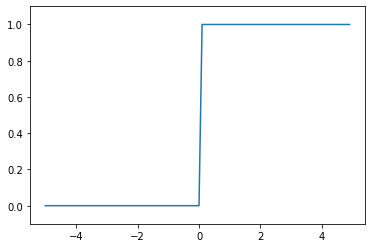

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 시그모이드 함수 구현하기

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


- 위의 함수가 넘파이 배열도 처리해줄 수 있는 비밀은 넘파이의 브로드캐스트
- 브로드캐스트 기능이란 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것

In [11]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0/t)

[2. 3. 4.]
[1.         0.5        0.33333333]


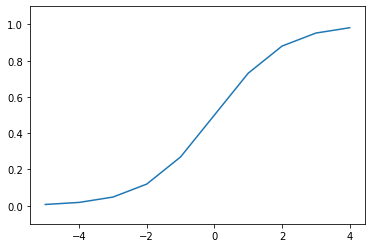

In [12]:
x = np.arange(-5.0, 5.0, 1.0)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 값 범위 지정
plt.show()

## 시그모이드 함수와 계단 함수 비교
- 차이점
    - 두 함수의 그래프를 보고 가장 먼저 느껴지는 차이점은 매끄럼움의 차이
    - 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화함
    - 계단 함수는 0을 경계로 출력이 값자기 변화함
    - 시그모이드 함수의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 됨
    - 계단 함수가 0과 1 중 하나의 값만 돌려주는 반면 시그모이드 함수는 실수를 돌려줌
    - 다시 말해 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면 신경망에서는 연속적은 실수가 흐름
- 공통점
    - 시그모이드 함수와 계단 함수 둘 다 입력이 작을 때는 0에 가깝게 입력이 커지면 1에 가까운 값이 출력됨
    - 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력
    - 입력이 아무리 크거나 작어도 출력은 0과 1 사이
    - 둘 모두 비선형 함수

## 비선형 함수
- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 함
- 선형함수를 사용하지 않는 이유는 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문
- 선형 함수의 문제는 층을 아무리 깊게 해도 "은닉층이 없는 네트워크"로도 똑같은 기능을 할 수 있다는 것
- 예를 들어 선형 함수인 h(x) = cx를 활성화 함수로 이용한 3층 네트워크의 경우 y(x) = h(h(h(x))) 의 식으로 나타낼 수 있음
- 이는 y(x) = c * c * c * x 처럼 곱셈을 세번 수행하지만 실은 y(x) = ax 와 같은 식 (a = c^3)
- 즉, 은닉층이 없는 네트워크로 표현할 수 있음 그러므로 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없음 

## ReLU 함수
- $ h(x)=
\begin{cases}
x,\;if\;x>0\\
0,\;if\;x\leq0
\end{cases}$
- 최근에는 ReLU(Rectified Linear Unit)함수를 주로 이용
- ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수

In [13]:
def relu(x):
    return np.maximum(0, x)

# 다차원 배열의 계산

## 다차원 배열
- 다차원 배열도 기본적으로 "숫자의 집합"
- 숫자가 한 줄로 늘어선 것, 직사각형으로 늘어놓은 것, N차원으로 나열하는 것을 통틀어서 다차원 배열이라 함

In [14]:
import numpy as np

In [15]:
# 1차원 배열
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [16]:
# 2차원 배열
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


- 2차원 배열은 행렬이라 부르고 가로방향을 행(row), 세로방향을 열(column)이라고 함

## 행렬의 곱

In [17]:
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


- np.dot은  입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산
- 여기서 주의해야 할 점은 np.dot(A, B)와 np.dot(B, A)의 값이 다를 수 있음
- 행렬의 곱셈은 피연산자의 순서가 다르면 결과도 다름

## 신경망에서의 행렬 곱

In [18]:
X = np.array([1,2])
print(X.shape)
W = np.array([[1,3,5], [2,4,6]])
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
(2, 3)
[ 5 11 17]


- 다차원 배열에 스칼라곱을 구해주는 np.dot 함수를 사용하명 단번에 결과 Y를 계산할 수 있음
- 그래서 행렬의 곱으로 한꺼번에 계산해주는 기능은 신경망을 구현할 때 매우 중요함

# 3층 신경망 구현하기

- 1층 첫번째 뉴런으로 가는 신호
- $ a^1_1 = w^1_{11}x_1 + w^1_{12}x_2 + b^1_1 $
- 여기에서 행렬의 곱을 이용하면 1층의 가중치 부분을 다음 식처럼 간소화 가능
- $ A^1 = XW^1 + B^1 $
- $ A = (a^1_1 \quad a^1_2 \quad a^1_3) $
- $ X = (x_1 \quad x_2) $
- $ B^1 = (b^1_1 \quad b^1_2 \quad b^1_3) $
- $ W = \begin{pmatrix}w^1_{11}&w^1_{21}&w^1_{31}\\w^1_{12}&w^1_{22}&w^1_{32} \end{pmatrix}$

In [19]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [20]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [21]:
# 1층에서 2층으로 연결되는 과정
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


- 마지막으로 2층에서 출력층으로 신호 전달
- 출력층의 구현도 그동안의 구현과 거의 같지만 활성화 함수만 은닉층과 다름

In [22]:
def identify_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)
print(Y)

[0.31682708 0.69627909]


## 구현 정리
- 신경망 구현의 관례에 따라 가중치만 W1과 같이 대문자로 작성하고, 그 외 편향과 중간 결과 등은 모두 소문자로 작성

In [23]:
from operator import ne
from tkinter import N


def init_network():
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([0.1, 0.2])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])

    return network


def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + B3
    y = identify_function(a3)

    return Y


network = init_network()
x = np.array([0.1, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


- init_network 함수는 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장
- 이 network에는 각층의 매개변수(가중치와 편향)를 저장
- forward 함수는 입력 신호를 출력으로 변환하는 처리 과정을 모두 구현
- 함수 이름이 forward인 이유는 신호가 순방향(입력에서 출력방향)으로 전달됨(순정하)

# 출력층 설계하기
- 신경망은 분류와 회귀 모두에 이용할 수 있음
- 다만, 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라짐
- 일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용

## 함등 함수와 소프트맥스 함수 구현하기
- 항등함수(identify function)은 입력을 그대로 출력, 입력과 출력이 항상 같다는 의미
- 분류에서 사용하는 소프트맥스 함수(softmax function)의 식은 다음과 같음
- $ y_k = \frac{exp(a_k)}{\displaystyle\sum_{i=1}^{n}{exp(a_i)}} $
- $ exp(x)$ 는 $ e^x $ 을 뜻하는 지수함수(exponential funtion), e는 자연상수, n은 출력층의 뉴런 수, $y_k$는  그 중 k번쨰 출력임을 의미
- 소프트맥스 함수의 분자는 입력 신호 $a_k$의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성됨
- 소프트맥스의 출력은 모든 입력 신호에서 영향을 받음

In [24]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [25]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

## 소프트맥스 함수 구현 시 주의점
- 소프트맥스 함수는 지수 함수를 사용하기 때문에 컴퓨터로 계산시 오버플로우 문제가 발생할 가능성이 높음
- $ y_k = \frac{exp(a_k)}{\displaystyle\sum_{i=1}^{n}{exp(a_i)}} = \frac{Cexp(a_k)}{C\displaystyle\sum_{i=1}^{n}{exp(a_i)}} = \frac{exp(a_k + \log C)}{\displaystyle\sum_{i=1}^{n}{exp(a_i + \log C)}} = \frac{exp(a_k + C^{'})}{\displaystyle\sum_{i=1}^{n}{exp(a_i + C^{'})}} $
- 첫 번째 변형에서는 $C$라는 임의의 정수를 분자와 분모 양쪽에 곱함
- 그 다음에 $C$를 지수함수 $exp()$ 안에 옮겨 $ \log C$로 만듦
- 마지막으로 $\log C$를 $C^{'}$라는 새로운 기호로 바꿈
- 위 식이 말하는 것은 소프트맥스 함수에 어떠한 정수를 더해도 값은 바뀌지 않는다는 것
- 여기서 $C^{'}$에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적

In [26]:
a = np.array([1010, 1000, 990])
print(np.exp(a)/np.sum(np.exp(a))) # nan = not a number

c = np.max(a)
print(a-c)

print(np.exp(a-c)/np.sum(np.exp(a-c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/var/folders/h5/gswr1sjs3pg7jdl_fq608b5m0000gp/T/ipykernel_20344/763123458.py:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(a)/np.sum(np.exp(a))) # nan = not a number
/var/folders/h5/gswr1sjs3pg7jdl_fq608b5m0000gp/T/ipykernel_20344/763123458.py:2: RuntimeWarning: invalid value encountered in divide
  print(np.exp(a)/np.sum(np.exp(a))) # nan = not a number


In [27]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

## 소프트맥스 함수의 특징

In [28]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


- 소프트맥스 함수의 출력은 0에서 1사이의 실수
- 소프트맥스 함수의 출력 총합은 1 > 그러므로 소프트맥스 함수의 출력을 확률로 해석할 수 있음
- 주의점으로 소프트맥스 함수를 적용하더라도 각 원소의 대소관계는 변하지 않음
- 지수 함수 $y = exp(x)$는 단조 증가 함수이기 때문
- 단조 증가 함수란 $a,b$가 $a \leq b$ 일때 $f(a) \leq f(b)$ 인 함수
- 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 이식
- 소프트맥스 함수를 적용하더라도 출력이 가장 큰 뉴런의 위치는 달라지지 않음 > 결과적으로 신경망으로 분류할 때 출력층의 소프트맥스 함수는 생략해도 됨
- 현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수를 생략하는 것이 일반적

## 출력층의 뉴런 수 정하기
- 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야함
- 분류에서는 분류하고 싶은 클래스의 수로 설정하는 것이 일반적

# 손글씨 숫자 인식
- 기계학습과 마찬가지로 신경망도 두 단계를 거쳐 문제를 해결
- 먼저 학습 데이터를 사용해 가중치 매개변수를 학습하고, 추론 단계에서는 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류
- 여기서 추론 과정을 신경망의 순전파(forward propagation)라고도 함

## MNIST 데이터셋
- MNIST 데이터셋은 손글씨 숫자 이미지 집합
- MNIST 데이터셋은 0부터 9까지의 숫자 이미지로 구성
- 학습데이터 60,000장 시험 데이터 10,000장 준비되어 있음
- MNIST의 이미지 데이터는 28X28 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0부터 255까지의 값을 가짐

In [29]:
# import sys, os
# sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [30]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


- load_mnist 함수는 읽은 MNIST 데이터를 (훈련 데이터, 훈련 레이블), (시험 데이터, 시험 레이블) 형식으로 변환
- 인수로는 normalize, flatten, one_hot_label을 받음 > 3가지 모두 bool
- normalize는 입력 이미지의 픽셀값을 0.0 ~ 1.0 사이의 값으로 정규화할지를 정함
- flatten은  입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정함
- one_hot_label은 one-hot encoding 형태로 저장할지르 정함
- one-hot encoding이란 [0, 1, 0, 0, 0, 0] 처럼 정답을 뜻하는 원소만 1이고 나머지는 모두 0인 배열